# Plotting

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

import pymatgen as pmg
from pymatgen import MPRester
import pandas as pd
api_key= "_____"  
mpr = pmg.MPRester(api_key)

In [2]:
def API_query(citeria, properties = list(mpr.supported_properties)):
    with MPRester(api_key) as mpr:
        search = mpr.query(criteria, properties)
        print("Search returned", len(search), "material(s)")
        df = pd.DataFrame(search)
        display(df.head())
        return search

# Creating a "Toy" Dataset

Let's create a "toy" dataset to look at how you might plot a materials project query. Let's start by looking at all materials taged as perovskite.

In [15]:
criteria = {"tags": {"$in": ["perovskite"]}}
properties = ['material_id', 'pretty_formula', "band_gap","e_above_hull", 'crystal_system']
print()
perovskites = API_query(criteria, properties)

  0%|          | 0/602 [00:00<?, ?it/s]

Search returned 602 material(s)


,material_id,pretty_formula,band_gap,e_above_hull,crystal_system
0,mp-1111150,K2LiCoF6,2.6277,0.000000,cubic
1,mp-1214640,Ba3CeIr2O9,0.0000,0.000000,hexagonal
2,mp-1205732,VNCl3,0.0000,0.956507,hexagonal
3,mp-1206861,Ba2ScReO6,0.0000,0.000000,cubic
4,mp-1209102,Sr2GdTaO6,3.5570,0.000000,monoclinic


Looking at the results returned `perovskites` we see our data is structured as a list of dictionaries. 

In [16]:
perovskites

[{'material_id': 'mp-1111150',
  'pretty_formula': 'K2LiCoF6',
  'band_gap': 2.6277,
  'e_above_hull': 0,
  'crystal_system': 'cubic'},
 {'material_id': 'mp-1214640',
  'pretty_formula': 'Ba3CeIr2O9',
  'band_gap': 0.0,
  'e_above_hull': 0,
  'crystal_system': 'hexagonal'},
 {'material_id': 'mp-1205732',
  'pretty_formula': 'VNCl3',
  'band_gap': 0.0,
  'e_above_hull': 0.9565072307679996,
  'crystal_system': 'hexagonal'},
 {'material_id': 'mp-1206861',
  'pretty_formula': 'Ba2ScReO6',
  'band_gap': 0.0,
  'e_above_hull': 0,
  'crystal_system': 'cubic'},
 {'material_id': 'mp-1209102',
  'pretty_formula': 'Sr2GdTaO6',
  'band_gap': 3.5570000000000004,
  'e_above_hull': 0,
  'crystal_system': 'monoclinic'},
 {'material_id': 'mp-1209786',
  'pretty_formula': 'Nd2MgPtO6',
  'band_gap': 2.0683000000000007,
  'e_above_hull': 0,
  'crystal_system': 'monoclinic'},
 {'material_id': 'mp-1211045',
  'pretty_formula': 'LiGd2RuO6',
  'band_gap': 0.1987000000000001,
  'e_above_hull': 0,
  'crystal_sy

We can create a general function to "unpack" items in a list of dictionaries into a list. This might seem similar to what we did in HW 2! Feel free to use this function in your own code.

In [17]:
def unpack(data, prop):
    '''
    Returns an ordered list of the property (prop)
    for all values in a data set (data).
    '''
    prop_list = []
    for material in data:
        prop_list.append(material[prop])
        
    return prop_list

Now unpacking some of the properties in `perovskites`

In [24]:
band_gaps = unpack(perovskites, 'band_gap')
e_above_hull = unpack(perovskites, 'e_above_hull')
crystal_system = unpack(perovskites, 'crystal_system')
band_gaps

[2.6277,
 0.0,
 0.0,
 0.0,
 3.5570000000000004,
 2.0683000000000007,
 0.1987000000000001,
 2.5719,
 0.0,
 0.0,
 0.06530000000000014,
 0.0,
 2.9823000000000004,
 0.0,
 0.0,
 1.5238,
 0.0,
 0.0,
 0.0,
 1.7195,
 0.0,
 3.3095000000000003,
 0.0,
 4.8166,
 0.0,
 0.0,
 0.0,
 2.0784,
 0.0,
 0.5204,
 0.0,
 6.986700000000001,
 5.1189,
 4.450099999999999,
 1.8841000000000006,
 0.0,
 0.0,
 0.0,
 0.4246000000000003,
 2.8178,
 0.6783000000000001,
 0.0,
 0.0,
 4.7641,
 0.0,
 0.6604000000000001,
 4.8869,
 3.7878,
 0.0,
 1.9422000000000001,
 0.6344000000000003,
 4.9009,
 0.0,
 0.0,
 0.0,
 4.5563,
 0.0,
 0.054999999999999716,
 1.6892,
 0.7561,
 0.0,
 4.6259999999999994,
 1.8452000000000002,
 0.0,
 0.0,
 0.9196,
 0.9942000000000002,
 1.3015999999999996,
 0.21919999999999984,
 0.0,
 0.5364000000000004,
 0.0,
 0.0,
 0.0,
 3.1986000000000003,
 3.8294999999999995,
 3.4592000000000005,
 0.9259999999999993,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0994999999999995,
 5.1392,
 0.0,
 0.8622999999999994,
 0.92480000000000

We can now use these unpacked lists to plot/visualize the data. For example:

Text(0, 0.5, 'Energy Above Hull (eV)')

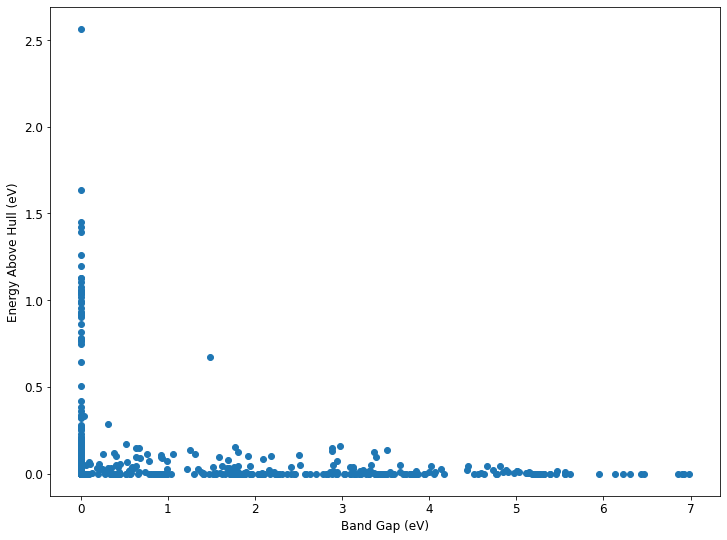

In [20]:
plt.scatter(band_gaps, e_above_hull)
plt.xlabel('Band Gap (eV)')
plt.ylabel('Energy Above Hull (eV)');

Text(0, 0.5, 'Counts')

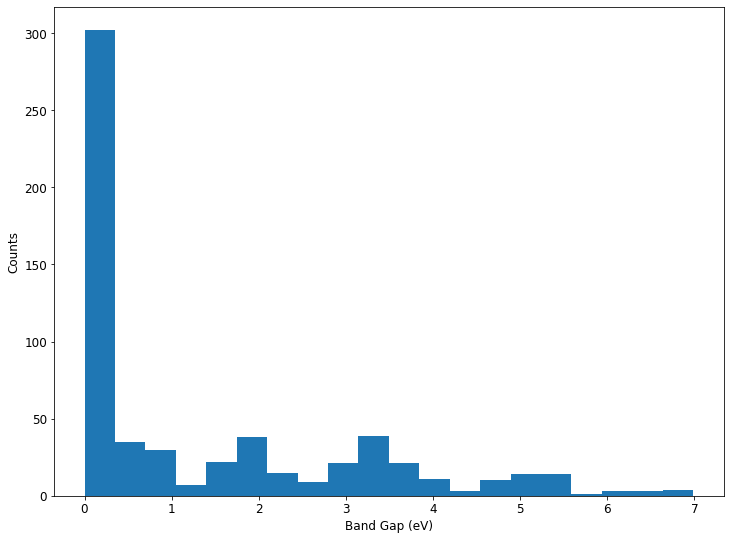

In [23]:
plt.hist(band_gaps, bins = 20)
plt.xlabel('Band Gap (eV)')
plt.ylabel('Counts');

# Dataframes
Alternatively we can use a data structure called [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) to store our results `perovskites` and plot directly using this dataframe.

In [25]:
# Creating a dataframe with results from perovskites query
perovskites_df = pd.DataFrame(perovskites)

# We can look at the first n-items by calling head(n)
perovskites_df.head(15)

,material_id,pretty_formula,band_gap,e_above_hull,crystal_system
0,mp-1111150,K2LiCoF6,2.6277,0.000000,cubic
1,mp-1214640,Ba3CeIr2O9,0.0000,0.000000,hexagonal
2,mp-1205732,VNCl3,0.0000,0.956507,hexagonal
3,mp-1206861,Ba2ScReO6,0.0000,0.000000,cubic
4,mp-1209102,Sr2GdTaO6,3.5570,0.000000,monoclinic
5,mp-1209786,Nd2MgPtO6,2.0683,0.000000,monoclinic
6,mp-1211045,LiGd2RuO6,0.1987,0.000000,monoclinic
7,mp-1206644,Ba2ScNbO6,2.5719,0.000000,cubic
8,mp-1212982,Eu2NiPtO6,0.0000,0.030994,monoclinic
9,mp-1214679,Ba2CaNbO6,0.0000,0.044292,cubic


Using `matplotlib` we can create those same graphs by giving our plotting function the dataframe under a parameter called `data = ` and specifying the names of the columns to plot.

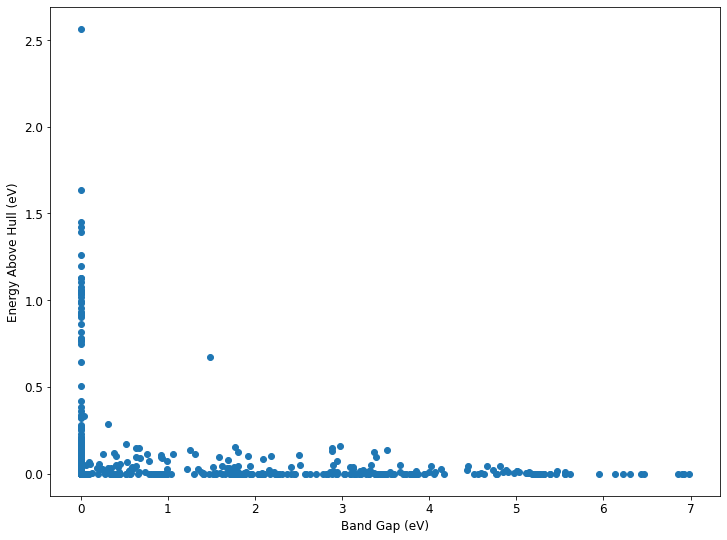

In [26]:
plt.scatter(x = 'band_gap', y = 'e_above_hull', data = perovskites_df)
plt.xlabel('Band Gap (eV)')
plt.ylabel('Energy Above Hull (eV)');

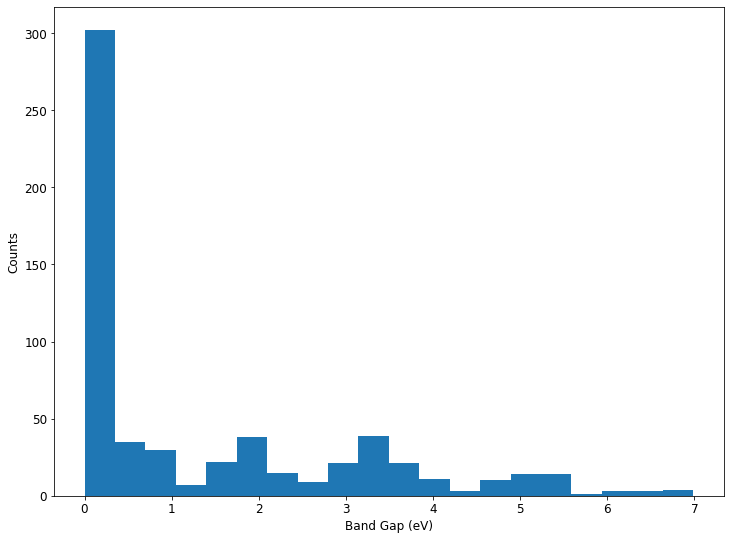

In [27]:
plt.hist('band_gap', bins = 20, data = perovskites_df)
plt.xlabel('Band Gap (eV)')
plt.ylabel('Counts');

You can also specify indivdual columns in a dataframe by added `df['column name']`. For example:

In [29]:
# Selecting all pretty formulas and converting them to an ordered list
pretty_formulas = list(perovskites_df['pretty_formula'])
pretty_formulas

['K2LiCoF6',
 'Ba3CeIr2O9',
 'VNCl3',
 'Ba2ScReO6',
 'Sr2GdTaO6',
 'Nd2MgPtO6',
 'LiGd2RuO6',
 'Ba2ScNbO6',
 'Eu2NiPtO6',
 'Ba2CaNbO6',
 'Lu3AlC',
 'Ba2ZrUO6',
 'Sr2LaNbO6',
 'LaFe4(CuO4)3',
 'UCrSe3',
 'CaHfS3',
 'CoNF3',
 'YbCrO3',
 'EuGaO3',
 'MnPb2WO6',
 'RbScBr3',
 'Ba2PaInO6',
 'CaNiH3',
 'KCaCl3',
 'Ba2TbMoO6',
 'HfCdO3',
 'MnNF3',
 'Ba2LiIO6',
 'Rb2NaPdF6',
 'Cs2NaUBr6',
 'Ba2LuReO6',
 'Cs2KScF6',
 'Rb2LiHoCl6',
 'ErScO3',
 'Ba2UCdO6',
 'SrPuO3',
 'Sr2CrMoO6',
 'Ba2LuMoO6',
 'LiNd2RuO6',
 'Ca2TaCrO6',
 'Eu2GdTaO6',
 'Ho3PbC',
 'CdNF3',
 'NaScTl2F6',
 'Ba2PuInO6',
 'Ba2PuZnO6',
 'NdLuO3',
 'NaNdMgWO6',
 'HfCdO3',
 'Ba2PrBiO6',
 'Ba2UGeO6',
 'RbSrCl3',
 'GaNi3C',
 'Sr2LiTeO6',
 'Mn3SnH',
 'CsSrBr3',
 'Ba2UTiO6',
 'Ba2EuMoO6',
 'Ba2UHgO6',
 'SmEu2TaO6',
 'YbPrO3',
 'RbCaBr3',
 'Nd2NiPtO6',
 'ZnNi3N',
 'EuUO3',
 'Sr2DyUO6',
 'Sr2LuUO6',
 'PrVO3',
 'Ba2CePuO6',
 'Ca2TmRuO6',
 'Eu2YTaO6',
 'La2NiWO6',
 'Rb2LiVCl6',
 'CsTmI3',
 'Ba6Na2V2Sb2O17',
 'Sr2HoTaO6',
 'Ba2SmPaO6',
 'Sr2HoUO6'

Let me know if you want to learn more about dataframes and/or have questions!

# Saving a Search
You may want to save a search "locally" to your computer so that you can access data if the materials project goes down or if some of your group members need data in a search you just ran. Let's save our most recent search as an excel file (this way we can edit it in Microsoft Excel or in Google Sheets)

In [31]:
# Saves file as an excel in the folder/dir that this notebook is in.
# Excel file name is perovskites_materials.xlsx

perovskites_df.to_excel(r'perovskites_materials.xlsx', index = False)
# Check the current folder that this notebook is in there will now be an excel file called
#  perovskites_materials.xlsx in it. Try opening it in Excel and see what's inside!

Now we can send this excel file `perovskites_materials.xlsx` to team members and/or manually remove some materials. At a future data or on another computer we can simply read this file to get our databack. **Also keep in mind this excel file MUST be in the same folder as the notebook** (You can add paths to the file but this is easiest).

In [32]:
# Reads the file we just wrote (note this is a new dataframe)

read_df = pd.read_excel(r'perovskites_materials.xlsx')
read_df.head()

,material_id,pretty_formula,band_gap,e_above_hull,crystal_system
0,mp-1111150,K2LiCoF6,2.6277,0.000000,cubic
1,mp-1214640,Ba3CeIr2O9,0.0000,0.000000,hexagonal
2,mp-1205732,VNCl3,0.0000,0.956507,hexagonal
3,mp-1206861,Ba2ScReO6,0.0000,0.000000,cubic
4,mp-1209102,Sr2GdTaO6,3.5570,0.000000,monoclinic
